# Importing essential libraries

1. NumPy for handling arrays
2. OpenCV for handling images
3. tqdm for progress bar
4. matplotlib for image plotting

In [ ]:
import numpy as np 
import cv2
from tqdm import tqdm

from matplotlib import pyplot as plt

# Importing dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def squaredError(leftPixel, rightPixel, sigma=2):
    return (leftPixel - rightPixel)**2 / (sigma**2)

In [ ]:
def forwardMatching(rowLeft, rowRight):
    nbColumns = rowLeft.shape[0]

    match = np.zeros((nbColumns, nbColumns))
    cost = np.ones((nbColumns, nbColumns))

    c0 = 1

    cost[0][0] = squaredError(rowLeft[0], rowRight[0])

    for i in range(1, nbColumns):
        cost[i][0], cost[0][i] = i * c0, i * c0
        
    for i in range(1, nbColumns):
        for j in range(1, nbColumns):
            min1 = cost[i-1][j-1] + squaredError(rowLeft[i], rowRight[j])
            min2 = cost[i-1][j] + c0
            min3 = cost[i][j-1] + c0

            cost[i][j] = min(min1, min2, min3)

            if(cost[i][j] == min1):       # disparity unchanged (Matched)
                match[i][j] = 1
            elif(cost[i][j] == min2):     # skipping a pixel in Il (A unit increases in disparity)
                match[i][j] = 2
            elif(cost[i][j] == min3):     # skipping a pixel in Ir (A unit decreases in disparity)
                match[i][j] = 3
            else:
              print("Error Occured in forward matching")
              exit()

    return match

In [ ]:
def backwardMatching(match):
    rowLeft = rowRight = match.shape[0] - 1

    disparityVectorLeft = np.zeros((match.shape[0], 1))
    disparityVectorRight = np.zeros((match.shape[0], 1))

    xRow = []
    yRow = []

    while(rowLeft != 0 and rowRight != 0):
        current = match[rowLeft][rowRight]

        xRow.append(rowLeft)
        yRow.append(rowRight)

        if(current == 1):       # disparity unchanged
            rowLeft -= 1
            rowRight -= 1
            disparityVectorLeft[rowLeft] = abs(rowRight - rowLeft)
            disparityVectorRight[rowRight] = abs(rowRight - rowLeft)

        elif(current == 2):     # skipping a pixel in Il (A unit increases in disparity)
            rowLeft -= 1
            disparityVectorLeft[rowLeft] = 0

        elif(current == 3):     # skipping a pixel in Ir (A unit decreases in disparity)
            rowRight -= 1
            disparityVectorRight[rowRight] = 0

        else:
            print("Error Occured in backward matching")
            exit()

    return disparityVectorLeft, disparityVectorRight, xRow, yRow

In [ ]:
def dynamicDisparity(imgLeft, imgRight):
    imgLeft = np.asarray(imgLeft, dtype=np.float32)
    imgRight = np.asarray(imgRight, dtype=np.float32)

    disparityMapLeft = np.zeros(imgLeft.shape)
    disparityMapRight = np.zeros(imgLeft.shape)

    xMatrix = []
    yMatrix = []

    for row in tqdm(range(imgLeft.shape[0])):
        rowMatch = forwardMatching(imgLeft[row], imgRight[row])
        disparityRowLeft, disparityRowRight, xRow, yRow = backwardMatching(rowMatch)

        xMatrix.append(xRow)
        yMatrix.append(yRow)

        disparityMapLeft[row] = disparityRowLeft.reshape(imgLeft.shape[1])
        disparityMapRight[row] = disparityRowRight.reshape(imgRight.shape[1])

    return disparityMapLeft, disparityMapRight, xMatrix, yMatrix

# Plotting Helper Functions

In [ ]:
def getImages(paths):
    imgLeft = cv2.imread(paths[0])
    imgRight = cv2.imread(paths[1])

    imgLeft = cv2.cvtColor(imgLeft, cv2.COLOR_BGR2GRAY)
    imgRight = cv2.cvtColor(imgRight, cv2.COLOR_BGR2GRAY)

    fig, ax = plt.subplots(1, 2, figsize = (15, 75))

    ax[0].imshow(imgLeft, cmap="gray")
    ax[0].set_title('Left Image')
    ax[1].imshow(imgRight, cmap="gray")
    ax[1].set_title('Right Image')

    return imgLeft, imgRight

In [ ]:
def getDisparity(imgLeft, imgRight, disparityMapLeft, disparityMapRight):
    disparityImageLeft = disparityMapLeft * 255 / np.max(disparityMapLeft)
    disparityImageRight = disparityMapRight * 255 / np.max(disparityMapRight)

    fig, ax = plt.subplots(2, 2, figsize = (13, 10))

    ax[0][0].imshow(imgLeft, cmap="gray")
    ax[0][0].set_title('Left Image')
    ax[0][1].imshow(disparityImageLeft, cmap="gray")
    ax[0][1].set_title('Left Image Disparity')

    ax[1][0].imshow(imgRight, cmap="gray")
    ax[1][0].set_title('Right Image')
    ax[1][1].imshow(disparityImageRight, cmap="gray")
    ax[1][1].set_title('Right Image Disparity')

# Creating disparity map of the first pair of images

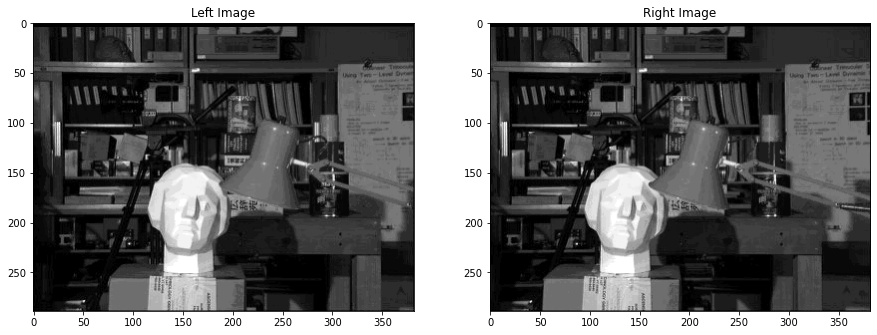

In [ ]:
paths = ["/content/drive/MyDrive/Projects/Computer Vision/Stereo Vision/Dataset/l1.png", 
         "/content/drive/MyDrive/Projects/Computer Vision/Stereo Vision/Dataset/r1.png"]
imgLeft, imgRight = getImages(paths)

100%|██████████| 289/289 [06:08<00:00,  1.27s/it]


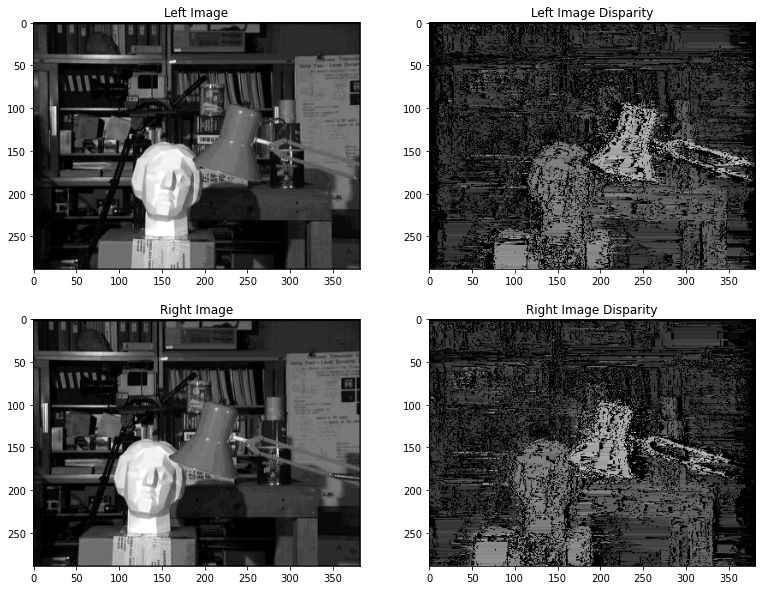

In [ ]:
disparityMapLeft, disparityMapRight, xMatrix, yMatrix = dynamicDisparity(imgLeft, imgRight)
getDisparity(imgLeft, imgRight, disparityMapLeft, disparityMapRight)

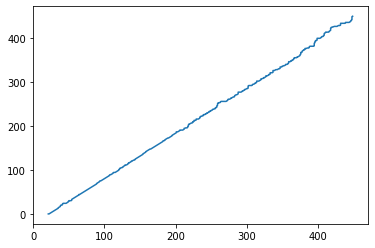

In [ ]:
plt.plot(xMatrix[1], yMatrix[1])

# Creating disparity map of the second pair of images

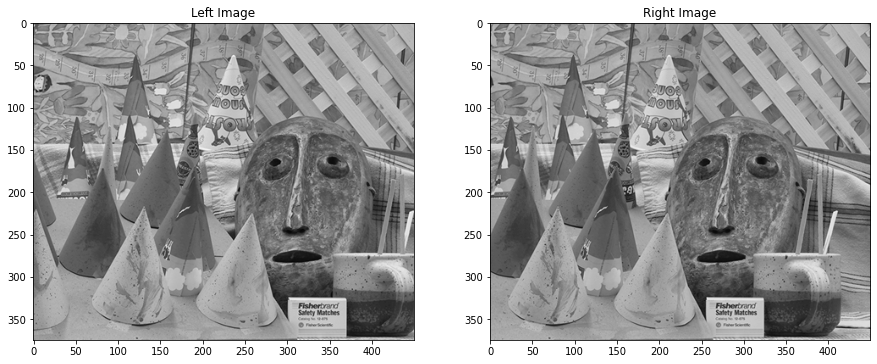

In [ ]:
paths = ["/content/drive/MyDrive/Projects/Computer Vision/Stereo Vision/Dataset/l2.png", 
         "/content/drive/MyDrive/Projects/Computer Vision/Stereo Vision/Dataset/r2.png"]
imgLeft, imgRight = getImages(paths)

100%|██████████| 375/375 [10:57<00:00,  1.75s/it]


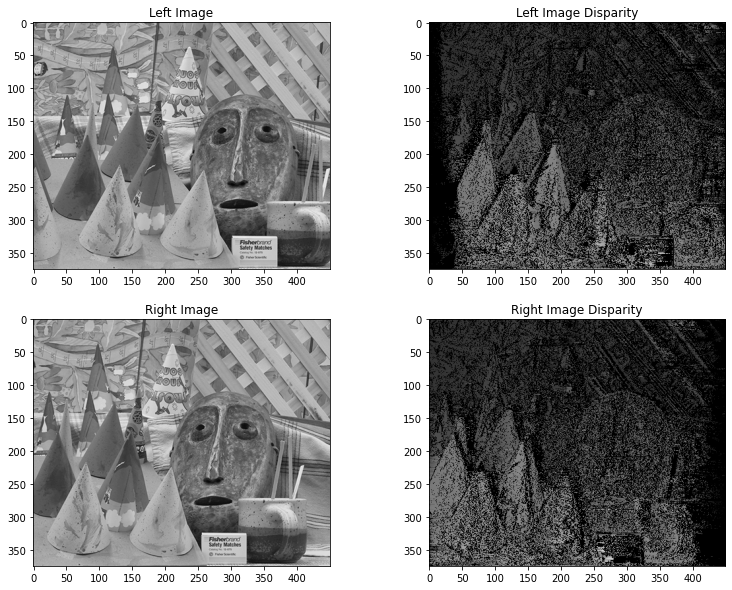

In [ ]:
disparityMapLeft, disparityMapRight, xMatrix, yMatrix = dynamicDisparity(imgLeft, imgRight)
getDisparity(imgLeft, imgRight, disparityMapLeft, disparityMapRight)

# Creating disparity map of the third pair of images

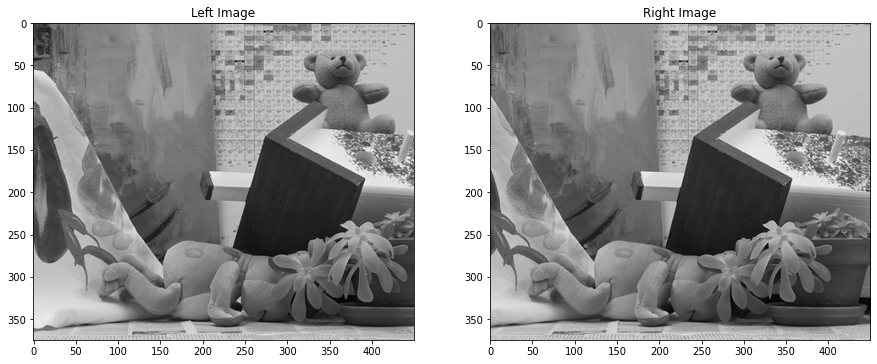

In [ ]:
paths = ["/content/drive/MyDrive/Projects/Computer Vision/Stereo Vision/Dataset/l3.png", 
         "/content/drive/MyDrive/Projects/Computer Vision/Stereo Vision/Dataset/r3.png"]
imgLeft, imgRight = getImages(paths)

100%|██████████| 375/375 [11:00<00:00,  1.76s/it]


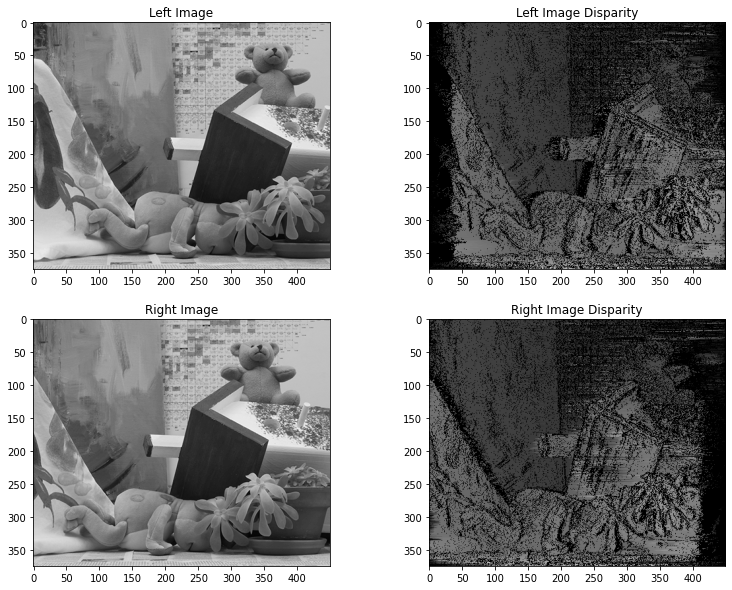

In [ ]:
disparityMapLeft, disparityMapRight, xMatrix, yMatrix = dynamicDisparity(imgLeft, imgRight)
getDisparity(imgLeft, imgRight, disparityMapLeft, disparityMapRight)